# Clustering modelo con data sin outliers

In [1]:
working_dir = "../data/"
%cd $working_dir

d:\Analisis de datos\TA\DataProyecto\adatos_ta\data


c:\Users\CLRLAP125\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

In [22]:
df = pd.read_csv("datos_post_step4a_scaled_no_dummies.csv")
df.head(5)

tipo_persona tipo_contribuyente  categoria_vehiculo marca_agrupada  \
0       natural            pequeno  b1234_pickup_otros           FORD   
1       natural            pequeno  b1234_pickup_otros      CHEVROLET   
2       natural            pequeno  b1234_pickup_otros          OTROS   
3  soc_conyugal            pequeno      a2_1051_1500cc        HYUNDAI   
4       natural            pequeno  b1234_pickup_otros         JETOUR   

  distrito_fiscal_agrupado porcentaje_propiedad_cat  valor_adquisicion_scaled  \
0                    OTROS        propietario_total                  1.011469   
1                    OTROS        propietario_total                 -0.620391   
2                    OTROS        propietario_total                  1.100199   
3                    OTROS        propietario_total                 -0.462014   
4                    OTROS        propietario_total                 -0.458006   

   valor_referencial_scaled  anios_desde_inscripcion_scaled  
0                  1.009691                             0.5  
1                 -0.522979                            -0.5  
2                  1.134870                             0.0  
3                 -0.815275                             0.5  
4                 -0.086379                             0.0

In [23]:
df.dtypes

tipo_persona                       object
tipo_contribuyente                 object
categoria_vehiculo                 object
marca_agrupada                     object
distrito_fiscal_agrupado           object
porcentaje_propiedad_cat           object
valor_adquisicion_scaled          float64
valor_referencial_scaled          float64
anios_desde_inscripcion_scaled    float64
dtype: object

## Partición de los datos

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.25, random_state=2025)
print(f"Train set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

Train set shape: (168838, 9)
Test set shape: (56280, 9)


In [25]:
x_train_numericas = x_train.select_dtypes(include='number')
print(x_train_numericas.shape)

x_test_numericas = x_test.select_dtypes(include='number')
print(x_test_numericas.shape)


x_train_categoricas = x_train.select_dtypes(include=['object', 'category', 'string'])
print(x_train_categoricas.shape)

x_test_categoricas = x_test.select_dtypes(include=['object', 'category', 'string'])
print(x_test_categoricas.shape)

(168838, 3)
(56280, 3)
(168838, 6)
(56280, 6)


# Transformaciones

In [26]:
from sklearn.preprocessing import OneHotEncoder
import joblib

ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
x_train_categoricas_ohe = ohe.fit_transform(x_train_categoricas)
cols = ohe.get_feature_names_out(x_train_categoricas.columns)
x_train_categoricas_ohe = pd.DataFrame(x_train_categoricas_ohe, columns=cols, index=x_train_categoricas.index)

joblib.dump(ohe, 's7cval_transform_ohe_encoder.pkl')

x_train_categoricas_ohe.head(3)

tipo_persona_natural  tipo_persona_otros  tipo_persona_soc_conyugal  \
105161                   1.0                 0.0                        0.0   
218793                   1.0                 0.0                        0.0   
109117                   0.0                 0.0                        0.0   

        tipo_contribuyente_mediano  tipo_contribuyente_pequeno  \
105161                         0.0                         1.0   
218793                         0.0                         1.0   
109117                         0.0                         1.0   

        categoria_vehiculo_a2_1051_1500cc  categoria_vehiculo_a3_1501_2000cc  \
105161                                0.0                                0.0   
218793                                0.0                                0.0   
109117                                0.0                                0.0   

        categoria_vehiculo_a4_mas_2000cc  \
105161                               0.0   
218793                               0.0   
109117                               0.0   

        categoria_vehiculo_b1234_pickup_otros  categoria_vehiculo_c1_camiones  \
105161                                    1.0                             0.0   
218793                                    1.0                             0.0   
109117                                    1.0                             0.0   

        ...  distrito_fiscal_agrupado_SAN JUAN DE LURIGANCHO  \
105161  ...                                              0.0   
218793  ...                                              0.0   
109117  ...                                              0.0   

        distrito_fiscal_agrupado_SAN JUAN DE MIRAFLORES  \
105161                                              0.0   
218793                                              0.0   
109117                                              0.0   

        distrito_fiscal_agrupado_SAN MARTIN DE PORRES  \
105161                                            0.0   
218793                                            0.0   
109117                                            0.0   

        distrito_fiscal_agrupado_SAN MIGUEL  \
105161                                  0.0   
218793                                  0.0   
109117                                  0.0   

        distrito_fiscal_agrupado_SANTA ANITA  \
105161                                   0.0   
218793                                   0.0   
109117                                   0.0   

        distrito_fiscal_agrupado_SANTIAGO DE SURCO  \
105161                                         0.0   
218793                                         0.0   
109117                                         0.0   

        distrito_fiscal_agrupado_SURQUILLO  \
105161                                 0.0   
218793                                 0.0   
109117                                 0.0   

        distrito_fiscal_agrupado_VILLA EL SALVADOR  \
105161                                         0.0   
218793                                         1.0   
109117                                         0.0   

        distrito_fiscal_agrupado_VILLA MARIA DEL TRIUNFO  \
105161                                               0.0   
218793                                               0.0   
109117                                               0.0   

        porcentaje_propiedad_cat_propietario_total  
105161                                         1.0  
218793                                         1.0  
109117                                         1.0  

[3 rows x 64 columns]

In [ ]:
x_test_categoricas_ohe = ohe.transform(x_test_categoricas)

cols = ohe.get_feature_names_out( x_test_categoricas.columns )
x_test_categoricas_ohe = pd.DataFrame(x_test_categoricas_ohe, columns=cols, index=x_test.index)

print(x_test_categoricas.shape)
print(x_test_categoricas_ohe.shape)

(56280, 6)
(56280, 64)


In [34]:
# K prototypes
x_train_v2 = pd.concat([x_train_numericas, x_train_categoricas], axis=1)
x_test_v2 = pd.concat([x_test_numericas, x_test_categoricas], axis=1)

print("Shape x_train_v2:", x_train_v2.shape)
print("Shape x_test_v2:", x_test_v2.shape)

# Dataset para KNN (numéricas escaladas + categóricas ohe) 
x_train_v3 = pd.concat([x_train_numericas, x_train_categoricas_ohe], axis=1)
x_test_v3 = pd.concat([x_test_numericas, x_test_categoricas_ohe], axis=1)

print("Shape x_train_v3:", x_train_v3.shape)
print("Shape x_test_v3:", x_test_v3.shape)

Shape x_train_v2: (168838, 9)
Shape x_test_v2: (56280, 9)
Shape x_train_v3: (168838, 67)
Shape x_test_v3: (56280, 67)


In [ ]:
%pip install kmodes
%pip install KPrototypes

# Aplicación K prototypes

In [28]:
from kmodes.kprototypes import KPrototypes

#modelo1 = KPrototypes(random_state = 2022, init = 'random', n_jobs = -1)

In [35]:
catColumnsPos = [x_train_v2.columns.get_loc(col) for col in list(df.select_dtypes(include=['object', 'category']).columns)]

print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns position  : [3, 4, 5, 6, 7, 8]


In [36]:
import itertools
import numpy as np
from kmodes.kprototypes import KPrototypes
import pandas as pd

def gridsearch_kprototypes(X, catCols, K_values, inits, n_inits, max_iters):
    results = []
    for k, init, n_init, max_iter in itertools.product(K_values, inits, n_inits, max_iters):
        print(f"\nProbando: K={k}, init={init}, n_init={n_init}, max_iter={max_iter}")

        model = KPrototypes( n_clusters=k, init=init,  n_init=n_init, max_iter=max_iter, random_state=2025, n_jobs=-1)
        labels = model.fit_predict(X, categorical=catCols)
        cost = model.cost_
        print(f" → Costo: {cost:.2f}")

        results.append({ 'K': k, 'init': init, 'n_init': n_init, 'max_iter': max_iter, 'cost': cost })

    df_results = pd.DataFrame(results)
    best = df_results.loc[df_results['cost'].idxmin()]

    print("\n Mejor combinación encontrada:")
    print(best)

    return best, df_results


In [37]:
K_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inits = ['Cao']
n_inits = [5 , 10]
max_iters = [50, 100]

# Sample 10k Registros

In [40]:
x_train_v2_sample_10k = x_train_v2.sample(10000, random_state=2025)
x_train_v2_sample_10k_matrix = x_train_v2_sample_10k.to_numpy()
x_train_v2_sample_10k_matrix

array([[-0.8240611636965388, -0.6371269358494985, -0.5, ..., 'SUZUKI',
        'CARABAYLLO', 'propietario_total'],
       [1.0662466330585822, 0.7904563455730799, 0.0, ..., 'TOYOTA',
        'LURIN', 'propietario_total'],
       [0.8139076935583643, 0.755514340811866, 0.5, ..., 'SUBARU',
        'LA MOLINA', 'propietario_total'],
       ...,
       [1.4342267170642362, 1.2603352587248196, -0.5, ...,
        'MERCEDES BENZ', 'SAN ISIDRO', 'propietario_total'],
       [0.5577675398703406, 0.6162215419468952, 0.5, ..., 'NISSAN',
        'LA VICTORIA', 'propietario_total'],
       [-0.2395082366135394, -0.3294706933062432, 0.0, ..., 'JAC',
        'MIRAFLORES', 'propietario_total']], dtype=object)

In [42]:
best_with_10k, df_results_with_10k = gridsearch_kprototypes(x_train_v2_sample_10k_matrix, catColumnsPos, K_values, inits, n_inits, max_iters)


Probando: K=2, init=Cao, n_init=5, max_iter=50
 → Costo: 22970.83

Probando: K=2, init=Cao, n_init=5, max_iter=100
 → Costo: 22970.83

Probando: K=2, init=Cao, n_init=10, max_iter=50
 → Costo: 22970.83

Probando: K=2, init=Cao, n_init=10, max_iter=100
 → Costo: 22970.83

Probando: K=3, init=Cao, n_init=5, max_iter=50
 → Costo: 16424.07

Probando: K=3, init=Cao, n_init=5, max_iter=100
 → Costo: 16424.07

Probando: K=3, init=Cao, n_init=10, max_iter=50
 → Costo: 16424.07

Probando: K=3, init=Cao, n_init=10, max_iter=100
 → Costo: 16424.07

Probando: K=4, init=Cao, n_init=5, max_iter=50
 → Costo: 14871.92

Probando: K=4, init=Cao, n_init=5, max_iter=100
 → Costo: 14871.92

Probando: K=4, init=Cao, n_init=10, max_iter=50
 → Costo: 14871.92

Probando: K=4, init=Cao, n_init=10, max_iter=100
 → Costo: 14871.92

Probando: K=5, init=Cao, n_init=5, max_iter=50
 → Costo: 13809.49

Probando: K=5, init=Cao, n_init=5, max_iter=100
 → Costo: 13809.49

Probando: K=5, init=Cao, n_init=10, max_iter=50


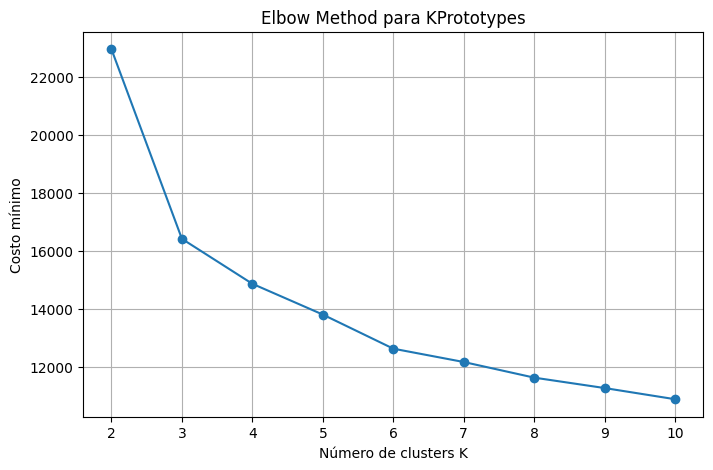

In [43]:
import matplotlib.pyplot as plt

# Agrupamos por K y tomamos el costo mínimo para cada K
elbow_data_10k = df_results_with_10k.groupby('K')['cost'].min().reset_index()

plt.figure(figsize=(8,5))
plt.plot(elbow_data_10k['K'], elbow_data_10k['cost'], marker='o')
plt.title("Elbow Method para KPrototypes")
plt.xlabel("Número de clusters K")
plt.ylabel("Costo mínimo")
plt.xticks(elbow_data_10k['K'])
plt.grid(True)
plt.show()

In [44]:
K_values = [5]
inits = ['Cao']
n_inits = [5, 10]
max_iters = [50, 100]

best_with_10k_k, df_results_with_10k_k= gridsearch_kprototypes(x_train_v2_sample_10k_matrix, catColumnsPos, 
                                                                                K_values, inits, n_inits, max_iters)


Probando: K=5, init=Cao, n_init=5, max_iter=50
 → Costo: 13809.49

Probando: K=5, init=Cao, n_init=5, max_iter=100
 → Costo: 13809.49

Probando: K=5, init=Cao, n_init=10, max_iter=50
 → Costo: 13809.49

Probando: K=5, init=Cao, n_init=10, max_iter=100
 → Costo: 13809.49

 Mejor combinación encontrada:
K                      5
init                 Cao
n_init                 5
max_iter              50
cost        13809.485205
Name: 0, dtype: object


In [45]:
x_train_v2_matrix = x_train_v2.to_numpy()
x_train_v2_matrix

array([[-0.1860660363641637, 0.0188222284488, -0.5, ..., 'CHANGAN',
        'OTROS', 'propietario_total'],
       [0.1202145979903307, 0.1070960869589265, -0.5, ..., 'NISSAN',
        'VILLA EL SALVADOR', 'propietario_total'],
       [0.9459396494292812, 0.4904072466224766, 0.5, ..., 'FORD',
        'PUEBLO LIBRE', 'propietario_total'],
       ...,
       [-0.2596197261131263, 0.2540959582640922, -0.5, ..., 'HONDA',
        'SAN ISIDRO', 'propietario_total'],
       [-0.4015339069475861, -0.5950592179102638, -0.5, ..., 'KIA',
        'SAN ISIDRO', 'propietario_total'],
       [0.3124961932270195, 0.1307002529392107, -0.5, ..., 'KIA',
        'VILLA EL SALVADOR', 'propietario_total']], dtype=object)

In [46]:
modelo1 = KPrototypes(n_clusters = 5, max_iter= 50, n_init= 5, random_state = 2025, init = 'Cao', n_jobs = -1, verbose=1)
modelo1.fit_predict(x_train_v2_matrix, categorical = catColumnsPos)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


array([4, 4, 3, ..., 1, 1, 1], dtype=uint16)

In [47]:
print(modelo1.cost_)

239932.2276290989


In [48]:
print(modelo1.cluster_centroids_)

[['-14.704995934496836' '0.018428188846857447' '0.25067385444743934'
  'natural' 'pequeno' 'b1234_pickup_otros' 'TOYOTA' 'SAN ISIDRO'
  'propietario_total']
 ['-0.17077543388600863' '-0.13331612694227038' '-0.16564940700028927'
  'juridica' 'grande' 'b1234_pickup_otros' 'OTROS' 'SAN ISIDRO'
  'propietario_total']
 ['-0.7909236238096913' '-0.6561279387967178' '0.05930854911037176'
  'natural' 'pequeno' 'b1234_pickup_otros' 'KIA' 'SANTIAGO DE SURCO'
  'propietario_total']
 ['0.9013364560283795' '0.8536252809220656' '-0.009152816251154201'
  'natural' 'pequeno' 'b1234_pickup_otros' 'TOYOTA' 'SAN ISIDRO'
  'propietario_total']
 ['0.08530708231950708' '0.06965041773345602' '0.06589640453127565'
  'natural' 'pequeno' 'b1234_pickup_otros' 'TOYOTA' 'SANTIAGO DE SURCO'
  'propietario_total']]


In [49]:
modelo1.n_iter_

18

In [50]:
x_train_v2['Cluster_modelo1'] = modelo1.labels_
x_train_v2.head(5)

valor_adquisicion_scaled  valor_referencial_scaled  \
105161                 -0.186066                  0.018822   
218793                  0.120215                  0.107096   
109117                  0.945940                  0.490407   
99829                  -0.339039                 -0.584367   
125227                 -1.702800                 -1.232108   

        anios_desde_inscripcion_scaled  tipo_persona tipo_contribuyente  \
105161                            -0.5       natural            pequeno   
218793                            -0.5       natural            pequeno   
109117                             0.5      juridica            pequeno   
99829                             -0.5       natural            mediano   
125227                             0.5  soc_conyugal             grande   

        categoria_vehiculo marca_agrupada distrito_fiscal_agrupado  \
105161  b1234_pickup_otros        CHANGAN                    OTROS   
218793  b1234_pickup_otros         NISSAN        VILLA EL SALVADOR   
109117  b1234_pickup_otros           FORD             PUEBLO LIBRE   
99829       a3_1501_2000cc         NISSAN               MIRAFLORES   
125227      a3_1501_2000cc        HYUNDAI               SAN ISIDRO   

       porcentaje_propiedad_cat  Cluster_modelo1  
105161        propietario_total                4  
218793        propietario_total                4  
109117        propietario_total                3  
99829         propietario_total                2  
125227        propietario_total                2

In [51]:
# Predicción en test set
# Las posiciones categóricas son las mismas que en train
print(f"Posiciones categóricas: {catColumnsPos}")
print(f"Total columnas: {x_test_v2.shape[1]}")

# Convertir a numpy
x_test_v2_matrix = x_test_v2.to_numpy()

# Predecir con las mismas posiciones categóricas
predicciones = modelo1.predict(x_test_v2_matrix, categorical=catColumnsPos)

# Asignar predicciones
x_test_v2['Clusters_modelo1'] = predicciones

print(x_test_v2.shape)
print("\nDistribución de clusters en test:")
print(x_test_v2['Clusters_modelo1'].value_counts(normalize=True))

Posiciones categóricas: [3, 4, 5, 6, 7, 8]
Total columnas: 9
(56280, 10)

Distribución de clusters en test:
Clusters_modelo1
4    0.289730
3    0.257374
2    0.241525
1    0.206574
0    0.004797
Name: proportion, dtype: float64


# Modelo de clasificacion

In [52]:
param_dist = {
    "n_neighbors": [5, 10, 15], 
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean']
}

In [53]:
x_train_v3

valor_adquisicion_scaled  valor_referencial_scaled  \
105161                 -0.186066                  0.018822   
218793                  0.120215                  0.107096   
109117                  0.945940                  0.490407   
99829                  -0.339039                 -0.584367   
125227                 -1.702800                 -1.232108   
...                          ...                       ...   
97784                  -0.338190                 -0.375950   
212556                  0.050019                 -0.196454   
142174                 -0.259620                  0.254096   
147410                 -0.401534                 -0.595059   
219710                  0.312496                  0.130700   

        anios_desde_inscripcion_scaled  tipo_persona_natural  \
105161                            -0.5                   1.0   
218793                            -0.5                   1.0   
109117                             0.5                   0.0   
99829                             -0.5                   1.0   
125227                             0.5                   0.0   
...                                ...                   ...   
97784                              0.5                   1.0   
212556                             0.5                   1.0   
142174                            -0.5                   0.0   
147410                            -0.5                   0.0   
219710                            -0.5                   0.0   

        tipo_persona_otros  tipo_persona_soc_conyugal  \
105161                 0.0                        0.0   
218793                 0.0                        0.0   
109117                 0.0                        0.0   
99829                  0.0                        0.0   
125227                 0.0                        1.0   
...                    ...                        ...   
97784                  0.0                        0.0   
212556                 0.0                        0.0   
142174                 0.0                        0.0   
147410                 0.0                        0.0   
219710                 0.0                        0.0   

        tipo_contribuyente_mediano  tipo_contribuyente_pequeno  \
105161                         0.0                         1.0   
218793                         0.0                         1.0   
109117                         0.0                         1.0   
99829                          1.0                         0.0   
125227                         0.0                         0.0   
...                            ...                         ...   
97784                          0.0                         1.0   
212556                         0.0                         1.0   
142174                         0.0                         0.0   
147410                         0.0                         0.0   
219710                         0.0                         0.0   

        categoria_vehiculo_a2_1051_1500cc  categoria_vehiculo_a3_1501_2000cc  \
105161                                0.0                                0.0   
218793                                0.0                                0.0   
109117                                0.0                                0.0   
99829                                 0.0                                1.0   
125227                                0.0                                1.0   
...                                   ...                                ...   
97784                                 0.0                                0.0   
212556                                0.0                                0.0   
142174                                0.0                                0.0   
147410                                1.0                                0.0   
219710                                0.0                                0.0   

        ...  distrito_fiscal_agrupado_SAN JUAN DE LURIG

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

modelo2 = KNeighborsClassifier( )

skf = StratifiedKFold(n_splits=3, random_state=2025, shuffle=True)

grid = GridSearchCV( modelo2, param_dist, cv=skf.split(x_train_v3, x_train_v2.Cluster_modelo1), n_jobs=-1, verbose=1)

grid.fit(x_train_v3, x_train_v2.Cluster_modelo1)

print(grid.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


In [55]:
param = grid.best_params_
param

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

In [56]:
modelo2 = KNeighborsClassifier(**param)

modelo2.fit(x_train_v3, x_train_v2.Cluster_modelo1)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

In [57]:
modelo2.score(x_train_v3, x_train_v2.Cluster_modelo1)

1.0

In [58]:
y_predict_modelo2 = modelo2.predict(x_test_v3)
y_predict_modelo2

array([4, 4, 3, ..., 2, 4, 2], dtype=uint16)

In [59]:
print(pd.DataFrame(y_predict_modelo2).value_counts())
print(pd.DataFrame(y_predict_modelo2).value_counts(normalize=True)*100)

0
4    16264
3    14329
2    13647
1    11775
0      265
Name: count, dtype: int64
0
4    28.898365
3    25.460199
2    24.248401
1    20.922175
0     0.470860
Name: proportion, dtype: float64


In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(x_test_v2.Clusters_modelo1, y_predict_modelo2)

0.9321073205401563

In [61]:
# Confusion matrix
print(pd.crosstab(x_test_v2.Clusters_modelo1, y_predict_modelo2))

col_0               0      1      2      3      4
Clusters_modelo1                                 
0                 265      0      5      0      0
1                   0  10835    320    141    330
2                   0    458  12717      0    418
3                   0    193      0  13709    583
4                   0    289    605    479  14933


In [62]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    adjusted_rand_score,
    jaccard_score,
    rand_score
)

# Rand Index
ri = rand_score(x_test_v2.Clusters_modelo1, y_predict_modelo2)

# Adjusted Rand Index
ari = adjusted_rand_score(x_test_v2.Clusters_modelo1, y_predict_modelo2)

# Jaccard Index
ji = jaccard_score(x_test_v2.Clusters_modelo1, y_predict_modelo2, average='macro')

print(f"Rand Index: {ri:.3f}")
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Jaccard Index (micro): {ji:.3f}")

Rand Index: 0.935
Adjusted Rand Index: 0.826
Jaccard Index (micro): 0.895


In [64]:
import plotly.express as px

fig = px.scatter_3d(x_train_v2, x='valor_adquisicion_scaled', y='valor_referencial_scaled', z='anios_desde_inscripcion_scaled', color='Cluster_modelo1')
fig.show()

# Modelo

In [ ]:
df_numericas = df.select_dtypes(include='number')
print(df_numericas.shape)

df_categoricas = df.select_dtypes(include=['object', 'string', 'category'])
print(df_categoricas.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scalerF = RobustScaler()

df_numericas_scaled = scalerF.fit_transform(df_numericas)

df_numericas_scaled = pd.DataFrame(df_numericas_scaled,
                                 columns=df_numericas.columns,
                                 index=df_numericas.index)

In [ ]:
print(df.shape)
print(df_numericas_scaled.shape)

df_v2 = pd.concat([df_numericas_scaled,
                             df_categoricas], axis=1)
print(df_v2.shape)

In [ ]:
df_v2.head(3)

In [ ]:
modelo1 = KPrototypes(n_clusters = 4, max_iter= 50, n_init= 5, random_state = 2025, init = 'Cao', n_jobs = -1, verbose=1)
modelo1.fit_predict(df_v2.to_numpy(), categorical = categorical_columns_pos)

In [ ]:
modeloFinal = modelo1

In [ ]:
df['Clusters_modeloFinal'] = modeloFinal.labels_
print(df.shape)
df.head(5)

In [ ]:
df['Clusters_modeloFinal'].value_counts(normalize=True)*100

In [ ]:
x_train_v2['Cluster_modelo1'].value_counts(normalize=True)*100

In [ ]:
grouped = df.groupby('Clusters_modeloFinal')[df.columns[1]]
stats_por_cluster = grouped.describe()
stats_por_cluster

In [ ]:
# Métricas por cluster
grouped = df.groupby('Clusters_modeloFinal')

# Iteramos sobre cada columna (excepto la columna de clusters)
for col in df.columns:
    if col == 'Clusters_modeloFinal':
        continue  # saltamos la columna de clusters
    print(f"\n%%%%%--- Estadísticas para la columna: {col} ---%%%%%")

    # Iteramos sobre cada cluster
    for cluster_name, datos_cluster in grouped[col]:
        print(f"\nCluster: {cluster_name}")
        print(datos_cluster.describe())

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='valor_adquisicion_pen', y='valor_referencial_2025_pen', z='anios_desde_inscripcion', color='Clusters_modeloFinal')
fig.show()

# Validando estabilidad

In [ ]:
# Validación de estabilidad de K-Prototypes con bootstrapping

import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Configuración de la validación
K = 4                     # cantidad de clústeres (como en modelo1)
n_runs = 20               # cantidad de perturbaciones (repeticiones)
sample_frac = 0.5         # fracción de datos usada en cada bootstrap

# Guardamos los labels obtenidos en cada ejecución
all_labels = np.zeros((n_runs, len(df_v2)), dtype=int)

# Repetir con perturbaciones
rng = np.random.default_rng(42)
for i in range(n_runs):
    print(f"Run {i+1}/{n_runs}...", end=" ")
    
    # Bootstrapping: seleccionar una submuestra del 80% de los datos
    idx = rng.choice(len(df_v2), size=int(sample_frac * len(df_v2)), replace=False)
    X_boot = df_v2.iloc[idx].to_numpy()

    # Entrenar K-Prototypes con inicialización aleatoria
    kproto = KPrototypes(
        n_clusters=K, 
        init='Cao', 
        n_init=3,  # Reducido para velocidad
        max_iter=15,  # Reducido para velocidad
        random_state=i,  # Variamos seed en cada run
        n_jobs=-1,
        verbose=0
    )
    kproto.fit(X_boot, categorical=categorical_columns_pos)

    # Predecir clústeres en TODO el dataset (no solo en bootstrap)
    labels = kproto.predict(df_v2.to_numpy(), categorical=categorical_columns_pos)
    all_labels[i, :] = labels
    print("✓")

# Medir estabilidad
# Calculamos el Adjusted Rand Index (ARI) entre todas las combinaciones de runs
stabilities = []
for i in range(n_runs):
    for j in range(i+1, n_runs):
        ari = adjusted_rand_score(all_labels[i, :], all_labels[j, :])
        stabilities.append(ari)

mean_stability = np.mean(stabilities)
std_stability = np.std(stabilities)
print(f"\n{'='*60}")
print(f"Stability (mean Adjusted Rand Index): {mean_stability:.4f}")
print(f"Stability (std Adjusted Rand Index):  {std_stability:.4f}")
print(f"{'='*60}")

# Interpretación
if mean_stability > 0.7:
    print("✓ ALTA ESTABILIDAD: El clustering es robusto y confiable")
elif mean_stability > 0.4:
    print("⚠ ESTABILIDAD MODERADA: El clustering es relativamente estable")
else:
    print("✗ BAJA ESTABILIDAD: El clustering puede no ser robusto")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
axes[0].hist(stabilities, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(mean_stability, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_stability:.3f}')
axes[0].set_xlabel("Adjusted Rand Index entre runs")
axes[0].set_ylabel("Frecuencia")
axes[0].set_title("Distribución de la estabilidad del clustering")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(stabilities, vert=True)
axes[1].set_ylabel("Adjusted Rand Index")
axes[1].set_title("Box Plot de estabilidad")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [84]:
# Resumen de variables numéricas por cluster
df_numericas_originales = df.select_dtypes(include='number').drop(columns=['es_valor_adquisicion_alto', 'es_valor_referencial_alto'], errors='ignore')

# Agregar cluster al dataframe de numéricas
df_numericas_con_cluster = df_numericas_originales.copy()
df_numericas_con_cluster['Cluster'] = df['Clusters_modeloFinal']

# Calcular estadísticas por cluster
perfil_numerico = df_numericas_con_cluster.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

print("="*80)
print("PERFIL NUMÉRICO POR CLUSTER")
print("="*80)
perfil_numerico

PERFIL NUMÉRICO POR CLUSTER


valor_adquisicion_scaled                                            \
                            mean     median       std        min       max   
Cluster                                                                      
0                     -14.733795 -14.935642  2.087842 -17.575213 -7.763639   
1                      -0.170654  -0.181119  0.378377  -2.128742  1.511938   
2                      -0.790459  -0.649787  0.735503  -7.549916  1.090097   
3                       0.902922   0.890714  0.302022  -0.385428  1.647210   
4                       0.086868   0.089294  0.275091  -1.531416  1.630411   

        valor_referencial_scaled                                          \
                            mean    median       std       min       max   
Cluster                                                                    
0                       0.014793  0.057674  0.706801 -4.153300  1.583778   
1                      -0.133981 -0.113911  0.389012 -2.557612  1.579808   
2                      -0.655706 -0.631808  0.323193 -5.027790  1.623749   
3                       0.855342  0.795597  0.292425 -0.630039  1.632956   
4                       0.071245  0.044438  0.268029 -2.238884  1.539279   

        anios_desde_inscripcion_scaled                             \
                                  mean median       std  min  max   
Cluster                                                             
0                             0.248518    0.5  0.315676 -0.5  0.5   
1                            -0.164593    0.0  0.374260 -0.5  0.5   
2                             0.062534    0.0  0.394867 -0.5  0.5   
3                            -0.009864    0.0  0.398729 -0.5  0.5   
4                             0.065737    0.0  0.391301 -0.5  0.5   

        Clusters_modeloFinal                      
                        mean median  std min max  
Cluster                                           
0                        0.0    0.0  0.0   0   0  
1                        1.0    1.0  0.0   1   1  
2                        2.0    2.0  0.0   2   2  
3                        3.0    3.0  0.0   3   3  
4                        4.0    4.0  0.0   4   4

In [85]:
# Análisis de variables categóricas por cluster
df_categoricas_originales = df.select_dtypes(include=['object', 'category', 'string'])

print("="*80)
print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS POR CLUSTER")
print("="*80)

for col in df_categoricas_originales.columns:
    print(f"\n{'*'*60}")
    print(f"Variable: {col}")
    print(f"{'*'*60}")
    
    # Tabla cruzada con porcentajes por cluster
    tabla = pd.crosstab(df['Clusters_modeloFinal'], df[col], normalize='index') * 100
    print(tabla.round(2))
    print()

DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS POR CLUSTER

************************************************************
Variable: tipo_persona
************************************************************
tipo_persona          juridica  natural  otros  soc_conyugal
Clusters_modeloFinal                                        
0                        35.57    42.89   0.10         21.44
1                        92.08     1.74   0.03          6.15
2                        19.40    54.51   0.02         26.07
3                        34.44    43.41   0.02         22.14
4                        11.42    60.34   0.01         28.22


************************************************************
Variable: tipo_contribuyente
************************************************************
tipo_contribuyente    grande  mediano  pequeno
Clusters_modeloFinal                          
0                      24.70     6.32    68.97
1                      79.67     7.72    12.62
2                       8.62     5.6

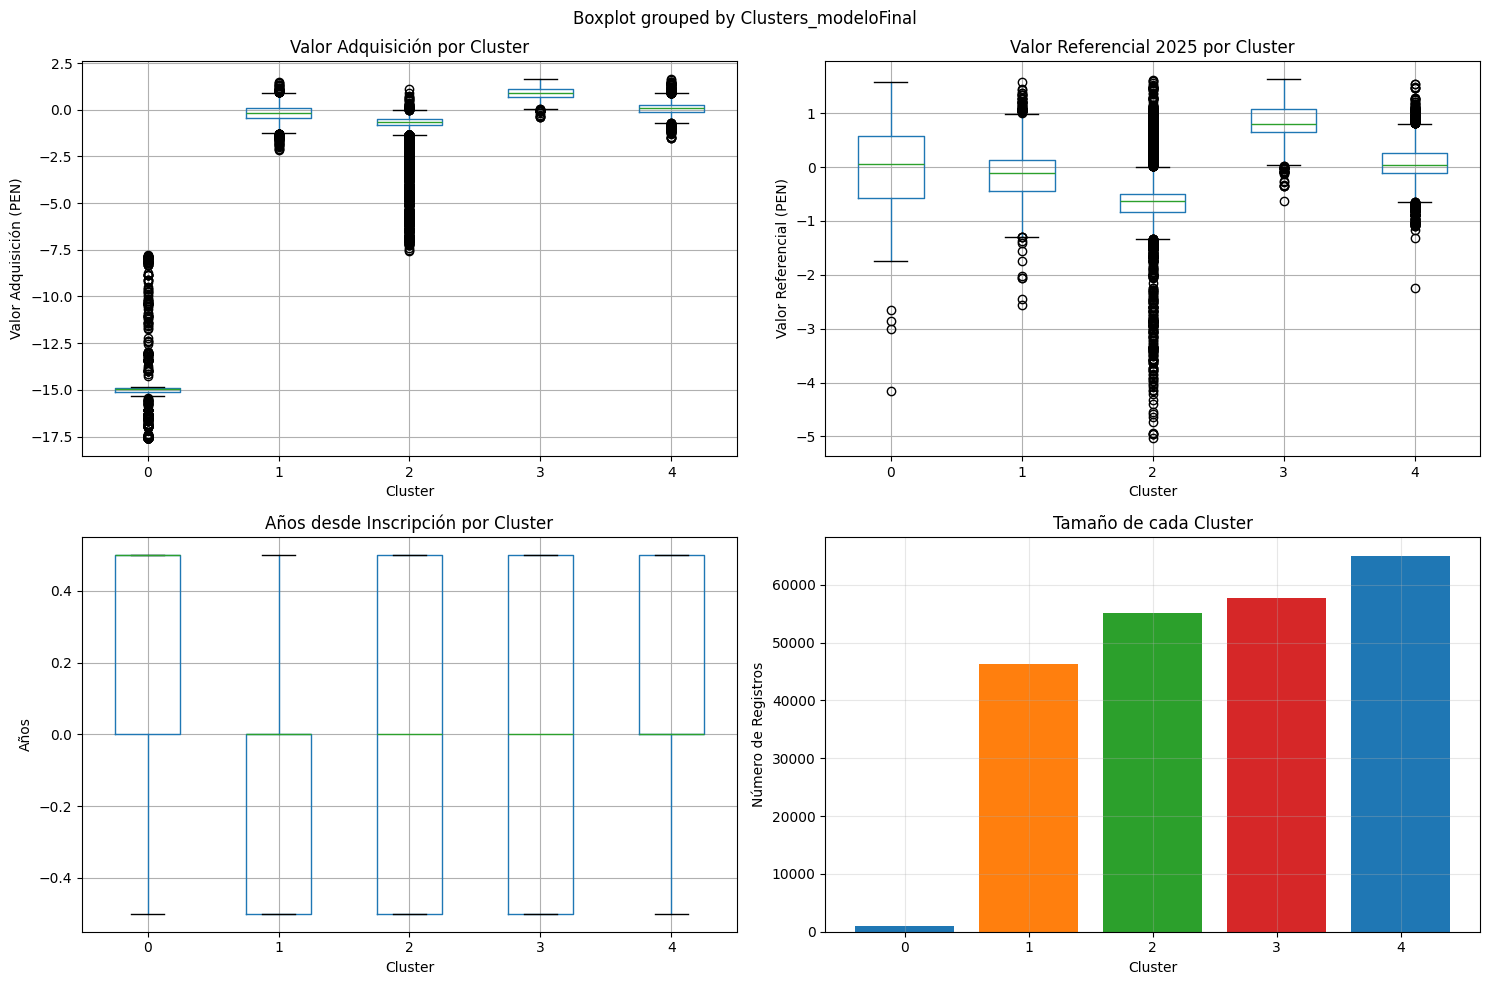

In [87]:
# Boxplots de variables numéricas clave por cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas por Cluster', fontsize=16, y=1.02)

# Variable 1: valor_adquisicion_pen
df.boxplot(column='valor_adquisicion_scaled', by='Clusters_modeloFinal', ax=axes[0, 0])
axes[0, 0].set_title('Valor Adquisición por Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Valor Adquisición (PEN)')

# Variable 2: valor_referencial_2025_pen
df.boxplot(column='valor_referencial_scaled', by='Clusters_modeloFinal', ax=axes[0, 1])
axes[0, 1].set_title('Valor Referencial 2025 por Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Valor Referencial (PEN)')

# Variable 3: anios_desde_inscripcion
df.boxplot(column='anios_desde_inscripcion_scaled', by='Clusters_modeloFinal', ax=axes[1, 0])
axes[1, 0].set_title('Años desde Inscripción por Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Años')

# Tamaño de cluster
cluster_sizes = df['Clusters_modeloFinal'].value_counts().sort_index()
axes[1, 1].bar(cluster_sizes.index, cluster_sizes.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1, 1].set_title('Tamaño de cada Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Número de Registros')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Crear tabla resumen interpretativa
print("="*80)
print("RESUMEN INTERPRETATIVO POR CLUSTER")
print("="*80)

for cluster_id in sorted(df['Clusters_modeloFinal'].unique()):
    cluster_data = df[df['Clusters_modeloFinal'] == cluster_id]
    
    print(f"\n{'#'*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'#'*60}")
    print(f"Tamaño: {len(cluster_data)} registros ({len(cluster_data)/len(df)*100:.2f}%)")
    print(f"\nCaracterísticas principales:")
    print(f"  - Valor adquisición medio: {cluster_data['valor_adquisicion_pen'].mean():.2f} PEN")
    print(f"  - Valor referencial medio: {cluster_data['valor_referencial_2025_pen'].mean():.2f} PEN")
    print(f"  - Años desde inscripción medio: {cluster_data['anios_desde_inscripcion'].mean():.2f} años")
    
    # Variables categóricas más frecuentes
    print(f"\nVariables categóricas predominantes:")
    for col in df_categoricas_originales.columns:
        moda = cluster_data[col].mode()
        if len(moda) > 0:
            freq = (cluster_data[col] == moda[0]).sum() / len(cluster_data) * 100
            print(f"  - {col}: {moda[0]} ({freq:.1f}%)")
    
print("\n" + "="*80)